In [2]:
from feature_selector_V3 import Feature_Selector_RL

In [3]:
test = Feature_Selector_RL(14, [], [], {}, eps=.4, nb_iter=200)

In [4]:
import numpy as np
import pandas as pd

In [5]:
#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
# write it as a new CSV file
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', sep=',', header=None)
australian_data.rename(columns={14: 'label'}, inplace=True)
X = australian_data.drop('label', axis=1)
y = australian_data['label']

In [6]:
results = test.fit_transform(X, y)
results

---------- AOR init ----------
---------- Process init ----------
---------- Data Processing ----------
---------- The process has been successfully init ----------
---------- Training ----------


100%|██████████| 200/200 [01:01<00:00,  3.24it/s]

---------- Results ----------


([(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
  array([196., 199., 200., 200., 200., 200., 199., 200., 200., 200., 181.,
         197.,  28., 200.]),
  (0.00021559092794650814,
   0.0036162683623412076,
   0.3412345801782839,
   0.8536022740184781,
   0.012908814460430951,
   0.0036098363536705967,
   0.003642538768438593,
   0.23519165893343064,
   0.009622560531883751,
   0.012886967504752229,
   0.00017159136900046695,
   0.0022024517484543673,
   -0.004159410462112137,
   0.027168686029735243),
  array([12, 10,  0, 11,  5,  1,  6,  8,  9,  4, 13,  7,  2,  3])],
 2600)

In [7]:
test.feature_structure

{0: [State(number=[0, 0], description=[], v_value=0.8563450374465885, reward=0, nb_visited=0)],
 1: [State(number=[1, 0], description=[3], v_value=0.34758995106663465, reward=0.5175438596491229, nb_visited=200)],
 2: [State(number=[2, 0], description=[3, 2], v_value=0.2379166660938521, reward=0.6271929824561403, nb_visited=200)],
 3: [State(number=[3, 0], description=[3, 2, 4], v_value=0.12635526315789491, reward=0.693859649122807, nb_visited=2),
  State(number=[3, 1], description=[3, 2, 7], v_value=0.023259260819129032, reward=0.8377192982456141, nb_visited=198)],
 4: [State(number=[4, 0], description=[3, 2, 4, 8], v_value=0.006078947368421072, reward=0.737719298245614, nb_visited=1),
  State(number=[4, 1], description=[3, 2, 4, 7], v_value=0.03442228860000138, reward=0.8210526315789475, nb_visited=9),
  State(number=[4, 2], description=[3, 2, 7, 13], v_value=0.01235718642205379, reward=0.8552631578947368, nb_visited=190)],
 5: [State(number=[5, 0], description=[3, 2, 4, 8, 12], v_val

---------- Data Processing ----------
---------- Score ----------
Set of variables : Benchmark : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] and RL : [10  0 11  5  1  6  8  9  4 13  7  2  3]
Benchmark accuracy : 0.868421052631579, RL accuracy : 0.868421052631579 with 13 variables [1]
Set of variables : Benchmark : [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13] and RL : [ 0 11  5  1  6  8  9  4 13  7  2  3]
Benchmark accuracy : 0.8552631578947368, RL accuracy : 0.868421052631579 with 12 variables [1, 1]
Set of variables : Benchmark : [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13] and RL : [11  5  1  6  8  9  4 13  7  2  3]
Benchmark accuracy : 0.8728070175438597, RL accuracy : 0.8508771929824561 with 11 variables [1, 1, 0]
Set of variables : Benchmark : [1, 2, 4, 5, 6, 7, 8, 9, 12, 13] and RL : [ 5  1  6  8  9  4 13  7  2  3]
Benchmark accuracy : 0.8596491228070176, RL accuracy : 0.8728070175438597 with 10 variables [1, 1, 0, 1]
Set of variables : Benchmark : [1, 2, 4, 6, 7, 8, 9, 12, 13] and RL : [ 1  

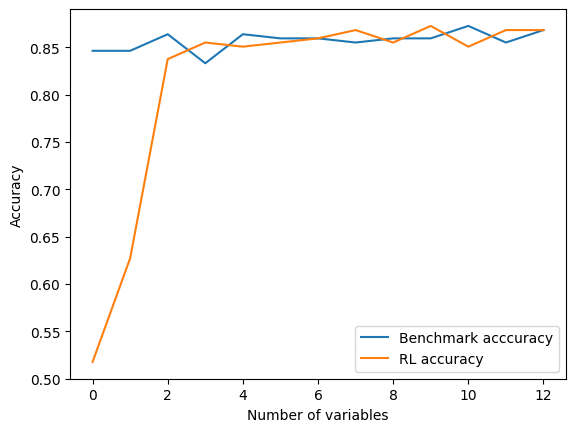

[1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]

In [11]:
test.compare_with_benchmark(X, y, results[0])

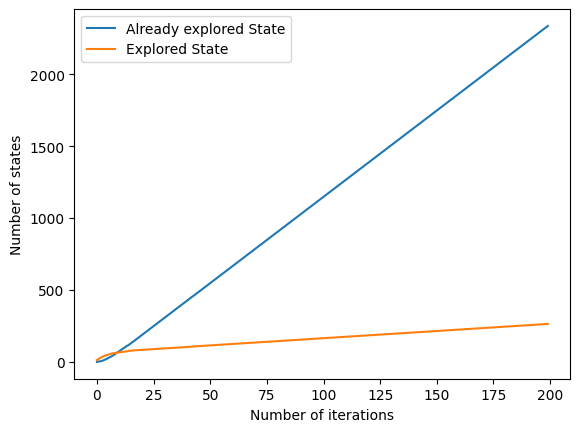

In [12]:
test.get_plot_ratio_exploration()

In [13]:
test.get_best_state()

([State(number=[11, 3], description=[3, 2, 4, 7, 13, 9, 8, 5, 0, 1, 6], v_value=-0.00521052631578938, reward=0.8710526315789474, nb_visited=1),
  0.8710526315789474],
 [State(number=[1, 0], description=[3], v_value=0.34758995106663465, reward=0.5175438596491229, nb_visited=200),
  0.34758995106663465])

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
#From RL
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train[[11, 13, 7, 8, 4, 1, 5]], y_train)
accuracy: float = clf.score(X_test[[11, 13, 7, 8, 4, 1, 5]], y_test)
print(accuracy)

#Benchmark
estimator = RandomForestClassifier(max_depth=4)
selector = RFE(estimator, n_features_to_select=11, step=1)
selector = selector.fit(X_train, y_train)
sele_acc = selector.score(X_test, y_test)
print(sele_acc)

0.868421052631579
0.8640350877192983
